In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
telecom_df_base=pd.read_csv('telecom_churn_data.csv', encoding='iso-8859-1')
telecom_plot_base=telecom_df_base.reset_index()
master_df=telecom_df_base.copy()
print(telecom_df_base.shape)

(99999, 226)


### Utilities Method

In [5]:
def null_na_estimator_grph(data_f,limit_val=None,graphical=False,size=(None,None)):
    """will return the % amount of null in data frame
       df: panda.DataFrame
       limit_val= (default=None) threshold value, example if limit_val=7, the estimator will return na with >=7
    """
    df=data_f.copy()
    est_ser=est_ser= (round(df.isna().sum()/len(df.index)*100,2)).sort_values(ascending=False)
    if limit_val!=None:
        est_ser= est_ser[est_ser>=limit_val]
    if graphical==True:
        df=pd.DataFrame(est_ser).reset_index()
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        fig=sns.barplot(data=df,x='index',y=0)
        fig.set_ylabel('Percentage')
        return fig
    else:
        return est_ser

In [6]:
def data_set_structure(df,return_tuple=False):
    """It will return the structure of dataframe or columns tuple as list
    out: tuple (non-num,num,month_6,month_7,month_8,month_9)
       : datafram ->structuring the complete dataset bifurcation
    """
    df_col=df.columns
    non_num_col=df.describe(include=['object']).columns
    num_col=df_col.difference(non_num_col)
    data_col_month=[x for x in df_col if re.search('_[0-9]$',x)!=None]
    col_9=[x for x in df_col if re.search('_9',x)!=None]
    col_8=[x for x in df_col if re.search('_8',x)!=None]
    col_7=[x for x in df_col if re.search('_7',x)!=None]
    col_6=[x for x in df_col if re.search('_6',x)!=None]
    col_9_n=[x for x in num_col if re.search('_9',x)!=None]
    col_8_n=[x for x in num_col if re.search('_8',x)!=None]
    col_7_n=[x for x in num_col if re.search('_7',x)!=None]
    col_6_n=[x for x in num_col if re.search('_6',x)!=None]
    
    if return_tuple==True:
        return non_num_col.tolist(),num_col.tolist(),col_6,col_7,col_8,col_9
    else:
        result=pd.DataFrame({'Month 6':[abs(len(col_6_n)-len(col_6)),len(col_6_n)],
                             'Month 7':[abs(len(col_7_n)-len(col_7)),len(col_7_n)],
                             'Month 8':[abs(len(col_8_n)-len(col_8)),len(col_8_n)],
                             'Month 9':[abs(len(col_9_n)-len(col_9)),len(col_9_n)]
                    },index=['Non-Numeric','Numeric'])
        result['Common']=[len(non_num_col)-(result.loc['Non-Numeric'].sum()),len(num_col)-(result.iloc[1,:].sum())]
        result['Total']=[result.loc['Non-Numeric'].sum(),result.loc['Numeric'].sum()]
        return result

In [7]:
def data_loss(df_old,df_new):
    """will be calculating the data loss been made in the dataframe"""
    df=pd.DataFrame({'Col loss':round(100*((len(df_old.columns)-len(df_new.columns))/len(df_old.columns)),2),
                    'Row loss':round(100*((len(df_old.index)-len(df_new.index))/len(df_old.index)),2),
                    'Data Retained':round(100*(len(df_new.columns)*len(df_new.index))/(len(df_old.columns)*len(df_old.index)),2)},index=['Percentage'])
    return df

In [8]:
def val_variance_estimator(dataFrame,graphical=False,size=(None,None),graph_filter_limit_max=0):
    variance_graph={}
    for i in range(0,len(dataFrame.columns)):
        variance_graph[dataFrame.columns[i]]=len(dataFrame.loc[:,dataFrame.columns[i]].unique())
    variance_graph_df=pd.DataFrame({'var':list(variance_graph.keys()),'count':list(variance_graph.values())})
    if graphical==True:
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        text_title='Value Variance Graph < '+str(graph_filter_limit_max)
        plt.title(text_title)
        fig=sns.barplot(x='var',y='count',data=variance_graph_df[variance_graph_df['count']<graph_filter_limit_max].sort_values(by='count',ascending=True))
        return fig
    else:
        return variance_graph_df

### EDA

##### An overview of data points and it's shape

In [9]:
print(telecom_df_base.info())
telecom_df_base.iloc[:,1:20].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26


#### Review and fix structural error

##### Correcting naming convention for some columns

In [10]:
telecom_df_base.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)
telecom_df_base[['vbc_3g_6','vbc_3g_7','vbc_3g_8','vbc_3g_9']].head()

,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9
0,101.20,0.0,30.4,3.58
1,0.00,0.0,0.0,0.00
2,4.17,0.0,0.0,0.00
3,0.00,0.0,0.0,0.00
4,0.00,0.0,0.0,0.00


In [11]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_df_base,return_tuple=True)
data_set_structure(telecom_df_base).head()

,Month 6,Month 7,Month 8,Month 9,Common,Total
Non-Numeric,3,3,3,3,0,12
Numeric,52,52,52,52,6,214


#### Exploring null/na in data set

##### Exploring data points variance

In [ ]:
variance_graph_df=val_variance_estimator(telecom_df_base)
val_variance_estimator(telecom_df_base,True,(15,3),graph_filter_limit_max=10)

##### Dropping columns not having much information to add to analysis

In [ ]:
#Revisiting the data which don't have variance equal to 1 or 2
variance_graph_df[variance_graph_df['count']<=2]['var']
for i in variance_graph_df[variance_graph_df['count']<=2]['var']:
    print(i," :",telecom_df_base.loc[:,i].unique())
drop_col=list(variance_graph_df[variance_graph_df['count']<=2]['var'])
#Dropping columns with just 2 values
print("As the value of these columns just have 2 values, which is not adding any information, we are going to drop them. As imputing them doesn't make sense")
telecom_df_base.drop(columns=drop_col,inplace=True)

In [ ]:
print(data_loss(master_df,telecom_df_base))
data_set_structure(telecom_df_base).head()

##### Checking null or na

In [ ]:
print(null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5)))

##### Imputing features important of modeling

In [ ]:
#As some columns will be used in analysis and the value range is only between 0,1,na, we are going to impute them with a new class i.e. -1 for na

for i in variance_graph_df.loc[(variance_graph_df['count']==3)]['var']:
    print(i," :",telecom_df_base.loc[:,i].unique())
impute_col=list(variance_graph_df[variance_graph_df['count']==3]['var'])

print("Imputing a new category of -1 reprsenting a miss")

telecom_df_base[impute_col]=telecom_df_base[impute_col].fillna(-1)
impute_col=['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
            'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
            'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']

print("Imputing 0 for missing values")
telecom_df_base[impute_col]=telecom_df_base[impute_col].fillna(0)

In [ ]:
null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5))

In [ ]:
telecom_df_base[impute_col].head()

##### Creating High value customer filter set

In [ ]:
hv_filter_col=['total_rech_amt_6','total_rech_data_6','total_rech_amt_7','total_rech_data_7',
'total_rech_amt_8','total_rech_data_8','total_rech_amt_9','total_rech_data_9']
#hv_filter_col=['total_rech_amt_6','total_rech_data_6','total_rech_num_6','total_rech_num_7','total_rech_amt_7','total_rech_data_7','total_rech_num_8','total_rech_amt_8','total_rech_data_8','total_rech_num_9','total_rech_amt_9','total_rech_data_9']
print("PRE-Computation: analysis for na/null\n",telecom_df_base[hv_filter_col].isnull().sum())

##### Filtering high value customers data

In [ ]:
print("Filtering high value customers")
telecom_df_base['total_month_rech_6']=telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[1]]
telecom_df_base['total_month_rech_7']=telecom_df_base.loc[:,hv_filter_col[2]]+telecom_df_base.loc[:,hv_filter_col[3]]
telecom_df_base['total_month_rech_8']=telecom_df_base.loc[:,hv_filter_col[4]]+telecom_df_base.loc[:,hv_filter_col[5]]
telecom_df_base['total_month_rech_9']=telecom_df_base.loc[:,hv_filter_col[6]]+telecom_df_base.loc[:,hv_filter_col[7]]
#telecom_df_base.to_csv('prehighvalue.csv')
hv_percentile=(telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[3]]).quantile(.7)
telecom_df_base=telecom_df_base[telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[3]]>hv_percentile]
telecom_df_base.reset_index(inplace=True)
print("Dimension of High value customer dataset: ",telecom_df_base.shape)

##### Converting churn=1 not-churn=0

In [ ]:
telecom_df_base['churn']=((telecom_df_base['total_ic_mou_9']+telecom_df_base['total_og_mou_9']>0) & (telecom_df_base['vol_2g_mb_9']+telecom_df_base['vol_3g_mb_9'])>0)
telecom_df_base.loc[:,'churn'].replace({True:1,False:0},inplace=True)

In [ ]:
plt.pie(x=[len(telecom_df_base[telecom_df_base['churn']==1]),len(telecom_df_base[telecom_df_base['churn']==0])],labels=['Churned','Not Churned'],autopct='%1.1f%%',colors=['yellowgreen', 'lightcoral'],explode=(.1,0))
plt.axis('equal')
plt.title('Telcom Churn Rate',fontsize=18,fontweight='bold')

##### Seprating Prediction and Training Data 

In [ ]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_df_base,return_tuple=True)
telecom_data_analysis=telecom_df_base.drop(columns=col_9,axis=1)

In [ ]:
drop_col=null_na_estimator_grph(telecom_data_analysis,limit_val=1)

##### Dropping all data with some null the dimesion reduction is = (29999, 163) -> (29999, 92)

In [ ]:
telecom_data_analysis.drop(columns=drop_col.index,axis=1,inplace=True)
#telecom_data_analysis.shape

In [ ]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_data_analysis,return_tuple=True)

In [ ]:
sns.pairplot(data=telecom_data_analysis[num_col])

In [ ]:
variance_graph_df1=val_variance_estimator(telecom_data_analysis)
variance_graph_df1[variance_graph_df1['count']<=]['var']

In [ ]:
#null_na_estimator_grph(telecom_data_analysis,5,graphical=False,size=(20,5))
std_og_mou_col=['std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9']
print(telecom_data_analysis[std_og_mou_col].describe())
telecom_data_analysis.drop(columns=std_og_mou_col,inplace=True)

In [ ]:
null_na_estimator_grph(telecom_data_analysis,0,graphical=False)

In [ ]:
## SHOULD BE REVISITED IF CONTIUE WITH DROP OF VARIABLE WITH NA>73%
drop_col=telecom_df_base.columns[null_na_estimator_grph(telecom_df_base)>73].tolist()
telecom_df_base.drop(drop_col,inplace=True,axis=1)

In [ ]:
data_loss(master_df,telecom_df_base)

In [ ]:
null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5))

##### Columns for monthly data sets

In [ ]:
import re


(data_col_month)

In [ ]:
#telecom_df_truncated=telecom_df_base.dropna(how='any')

In [ ]:
variance_graph_df[variance_graph_df['count']<=5]['var']

In [ ]:
#data_loss(master_df,telecom_df_truncated)

In [ ]:
print(master_df.shape)
print(telecom_df_truncated.shape)
print(telecom_df_base.shape)

In [ ]:
telecom_df_base[hv_filter_col]

In [ ]:
telecom_df_truncated.shape
(round(telecom_df_truncated.isna().sum()/len(telecom_df_truncated.index)*100,2)).sort_values(ascending=False)

In [ ]:
telecom_df_base[num_col].info()

In [ ]:
sns.scatterplot(data=telecom_plot_base,x_vars=num_col,y_vars=['index'])

In [ ]:
print(telecom_df_base[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].mean()-telecom_df_base[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].std())

In [ ]:
# Calculating the imputing variable
result=[abs(telecom_df_base[num_col].mean()-telecom_df_base[num_col].std())<.5]

In [ ]:
print((num_col[result[0].reset_index()[0]]))
print((num_col))

In [ ]:
sns.catplot(data=telecom_df_base,x='total_rech_data_6', y='circle_id', kind='swarm')

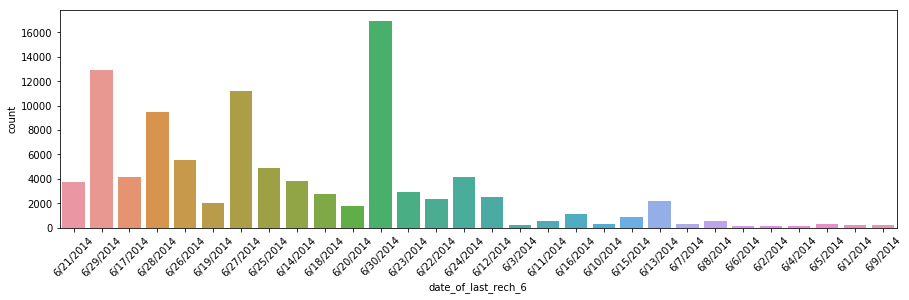

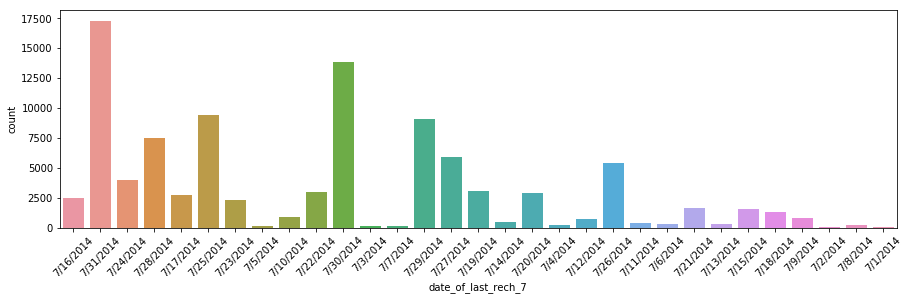

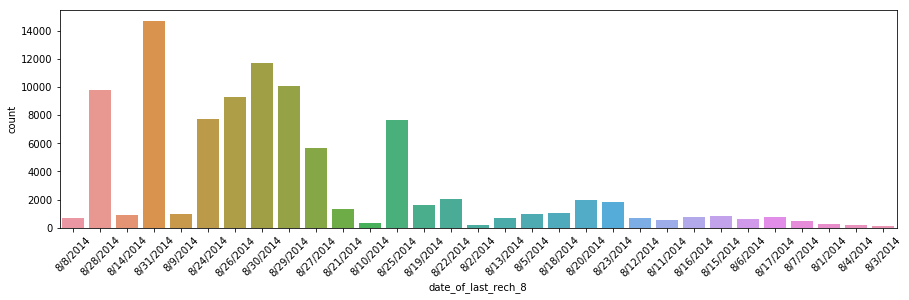

In [14]:
%matplotlib inline
counter=1
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.countplot(data=telecom_df_base[non_num_col],x='date_of_last_rech_6')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.countplot(data=telecom_df_base[non_num_col],x='date_of_last_rech_7')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.countplot(data=telecom_df_base[non_num_col],x='date_of_last_rech_8')

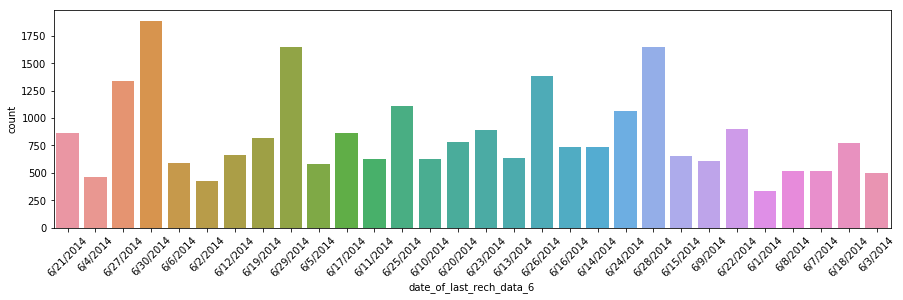

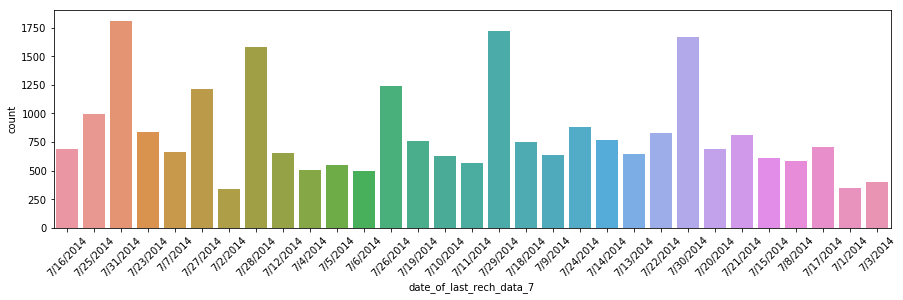

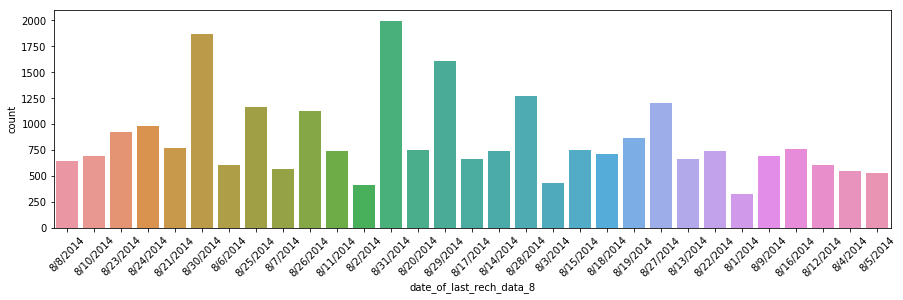

In [13]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.countplot(data=telecom_df_base[non_num_col],x='date_of_last_rech_data_6')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.countplot(data=telecom_df_base[non_num_col],x='date_of_last_rech_data_7')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.countplot(data=telecom_df_base[non_num_col],x='date_of_last_rech_data_8')

###  Data-cleaning

In [ ]:
(telecom_df_base.isna().sum()/len(telecom_df_base.index)*100).sort_values(ascending=False)

In [ ]:
df_col.difference(pd.Index(data_col_month))

In [ ]:
print(len(data_col_9)," ",len(data_col_8)," ",len(data_col_7)," ",len(data_col_6))

### EDA

In [ ]:
sns.c